In [1]:
# Radu Vasile-Catalin, grupa 411, Data Science

In [2]:
%pip install scikit-learn
%pip install pyod
%pip install keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=a46c72faf6a042337d10d902691539dc8cf28d8adcd6045852ecb8181fba7ca1
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


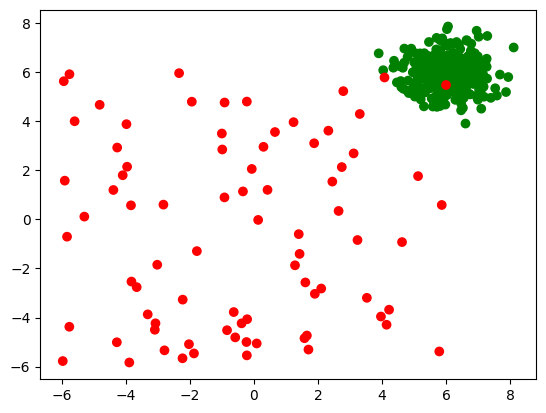

In [3]:
#1

import pyod;
cont = 0.2
x_train, x_test, y_train, y_test = pyod.utils.data.generate_data(
    n_train=400,
    n_test=100,
    n_features=2,
    contamination=cont
)

import matplotlib;

colors = [];

for data in y_train:
  if data == 1:
    colors.append('red')
  else:
    colors.append('green')

matplotlib.pyplot.scatter(x_train[:,0], x_train[:,1], c = colors);

In [4]:
#2
from pyod.models.knn import KNN   # kNN detector
import sklearn
import sklearn.metrics as metrics


model = KNN(contamination=cont)
model.fit(x_train);
y_train_pred = model.labels_
y_test_pred = model.predict(x_test)


tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_test, y_test_pred).ravel();
print("TN")
print(tn)
print("FP")
print(fp)
print("FN")
print(fn)
print("TP")
print(tp)

TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
BA = (TPR + TNR) / 2
print("BA")
print(BA)

TN
80
FP
0
FN
0
TP
20
BA
1.0


[0. 0. 0. 1.]
[0.   0.05 1.   1.  ]
[       inf 3.38147579 0.96183781 0.0763051 ]


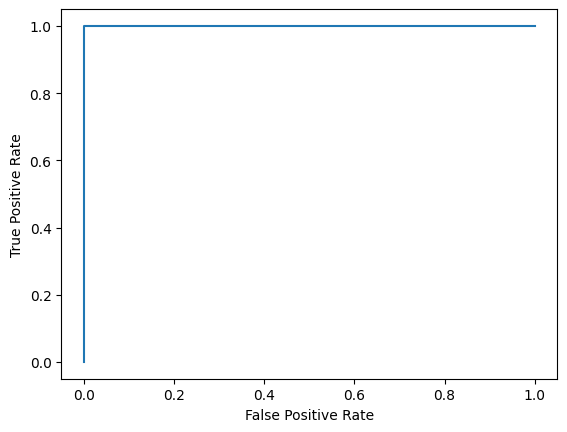

In [5]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_test_scores = model.decision_function(x_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_scores)
print(fpr)
print(tpr)
print(threshold)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [6]:
#3
import numpy as np

x_train, x_test, y_train, y_test = pyod.utils.data.generate_data(
    n_train=1000,
    n_test=0,
    n_features=1,
    contamination=0.1
)

mean = np.mean(x_train)
print("Mean: ", mean)
dev = np.std(x_train)
print("Dev: ", dev)

z_score = abs(x_train - mean) / dev
quant = np.quantile(z_score, 1 - 0.1)
print("Quant: ", quant)

Mean:  7.281394555881547
Dev:  2.8573650596832607
Quant:  0.860846853695116


In [7]:
y_pred = []

for z_sc in z_score:
  if abs(z_sc) < quant:
    y_pred.append(1)
  else:
    y_pred.append(0)

tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_train, y_pred).ravel();
print(tn)
print(fp)
print(fn)
print(tp)

TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
BA = (TPR + TNR) / 2
print("BA")
print(BA)

20
880
80
20
BA
0.11111111111111112


Text(0.5, 0.92, '3D Plot of Non-Contaminated (Green) and Contaminated (Red) Data')

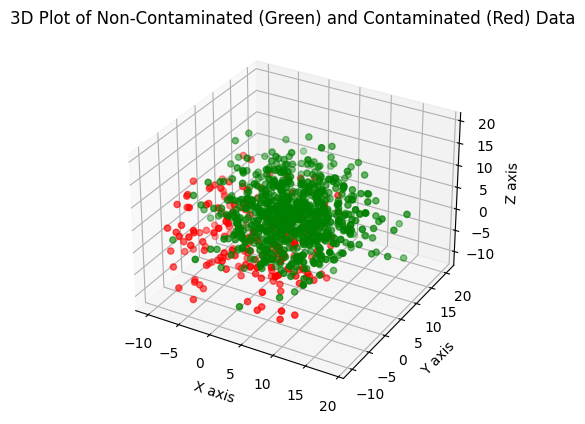

In [20]:
#4

samples_number = 1000
dimmensions = 3
contamination_rate = 0.2 #20%
non_contamined_data_number = int(samples_number * (1 - contamination_rate))
contaminated_data_number = int(samples_number * contamination_rate)

# pyod.utils.data.generate_data generates normal data with gaussian dist, and
# outliners with a uniform distribution
non_contaminated_data = np.random.normal(4, 5, (non_contamined_data_number, dimmensions))
# pyod.utils.data.generate_data uses 10 as well
contaminated_data = np.random.uniform(-10, 10, (contaminated_data_number, dimmensions))

x_train = np.concatenate([non_contaminated_data, contaminated_data])
y_train = np.concatenate([np.zeros(non_contamined_data_number), np.ones(contaminated_data_number)])

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(non_contaminated_data[:, 0], non_contaminated_data[:, 1], non_contaminated_data[:, 2], c='green', label='Non-Contaminated (0)')
ax.scatter(contaminated_data[:, 0], contaminated_data[:, 1], contaminated_data[:, 2], c='red', label='Contaminated (1)')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Plot of Non-Contaminated (Green) and Contaminated (Red) Data')

In [34]:
mean = np.mean(x_train);
print("Mean =", mean)
deviation = np.std(x_train)
print("Deviation =", deviation)
z_score = np.max(abs(x_train - mean) / deviation, axis = 1)
quant = np.quantile(z_score, 1 - contamination_rate)
print("Quantile =", quant)
y_pred = (z_score > quant).astype(int)
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_train, y_pred).ravel();
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
BA = (TPR + TNR) / 2
print("Balanced Accuracy =", BA)

Mean = 3.2148694838779255
Deviation = 5.347389779532104
Quantile = 1.8455148758953992
Balanced Accuracy = 0.6375
